In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/booooks/clean_books.csv


# Import

In [2]:
import pandas as pd
import numpy as np

# Read the data using the dataframe and returning the first 5 rows

In [3]:
books=pd.read_csv('/kaggle/input/booooks/clean_books.csv')
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


# Checking null values and the data types

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


# Closer look at categorical columns

In [5]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

# Closer look at numerical columns

In [6]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


# Visualizing numerical data

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


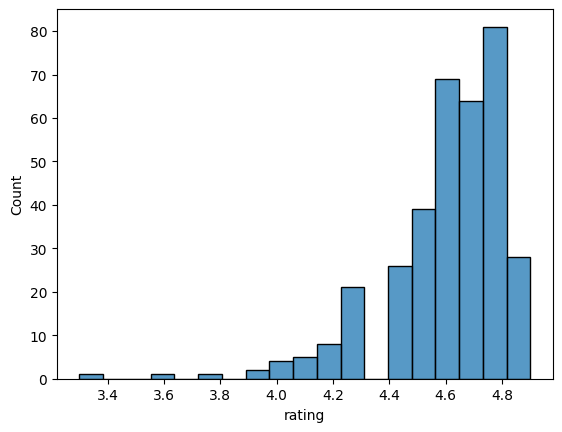

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=books, x='rating')
plt.show()

# Adjusting bin width

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


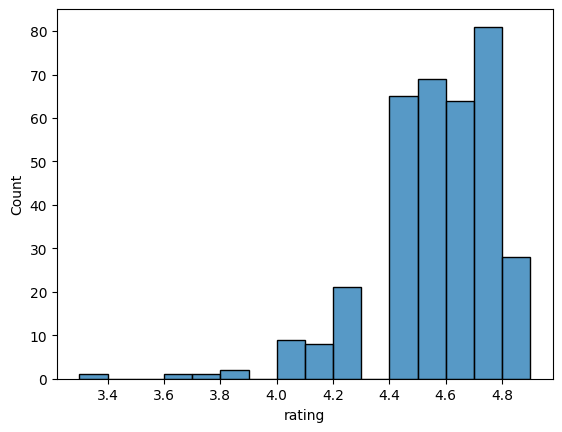

In [8]:

sns.histplot(data=books, x='rating', binwidth=0.1)
plt.show()

# Validating data types

In [9]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

# Updating and playing around data types

In [10]:
books['year']=books['year'].astype('float')

# Checking whether the year column is stored as float(testing stage)

In [11]:
books.dtypes

name       object
author     object
rating    float64
year      float64
genre      object
dtype: object

# Updating to the correct data type

In [12]:
books['year']=books['year'].astype('int')

In [13]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [14]:
#CommonDatatypes
#str,int,float,dict,list,bool

# Validate categorical data (inside the column)

In [15]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [16]:
books['genre'].isin(['Fiction','Non Friction'])

0      False
1       True
2      False
3       True
4      False
       ...  
345    False
346     True
347    False
348     True
349    False
Name: genre, Length: 350, dtype: bool

# True for Fiction and No Fiction AND False for Children

In [17]:
books['genre'].isin(['children'])

0      False
1      False
2      False
3      False
4      False
       ...  
345    False
346    False
347    False
348    False
349    False
Name: genre, Length: 350, dtype: bool

# Data summarization

In [18]:
books[['genre', 'rating','year']].groupby('genre').mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


# Aggregating ungrouped data AND applies to numerical columns

In [19]:
#df[['columns separated with a comma']. agg(['aggfunction separated by ,'])]
books[['rating','year']].agg(['mean','std'])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


# Using the dictionary to specify aggregations for columns

In [20]:
#df.agg({'column1':['agg1','agg2',ect], 'column2': ['agg3'])
books.agg({'rating': ['mean','std'], 'year': ['median']})

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


# Combining .agg AND .groupby using named summary columns

In [21]:
#df.groupby('column to groupby'.agg(named_column=('column','nameagg'), ect))
books.groupby('genre').agg(mean_rating=('rating','mean'),std_rating=('rating','std'),median_year=('year','median'))

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


# Visualizing categorical summaries

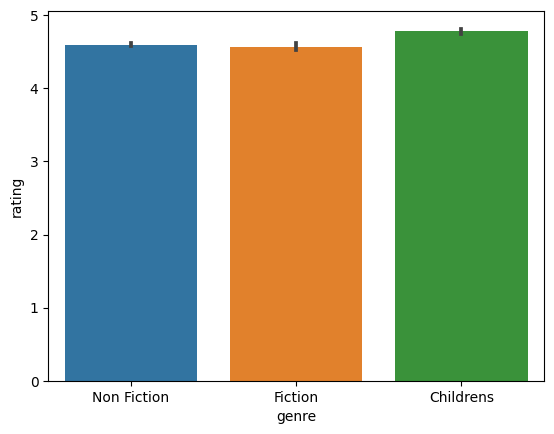

In [22]:
sns.barplot(data=books, x='genre', y='rating')
plt.show()

# Save the output

In [23]:
books.to_csv("processed_books.csv")